In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Test data has 153,164 rows.

In [44]:
#exoloring test data
test_ds = pd.read_csv('test.csv', header = 0)

print(test_ds.shape)
print(test_ds.head(5))

(153164, 2)
                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.


The test labels file also has 153164 rows; however, not all rows contain valid values.  For example, some rows contain "-1" for all test categories.  Per the Kaggle site, a value of "-1" meant it was not used for scoring during the Kaggle competition for this data set.  For our purposes, we will just disregard rows that do not have any value values since it won't provide us a good way to validate our results.  When we filter out the rows with invalid values, we are still left with a test data set of 63,973 rows.

In [55]:
#exploring test data
test_labels_ds = pd.read_csv('test_labels.csv', header=0, na_values=-1)

print(test_labels_ds.shape)
# print(test_labels_ds.head(5))

# null_data = test_labels_ds[test_labels_ds.isnull().any(axis=1)]
#
# print(null_data.shape)
# print(null_data.head())


non_null_data = test_labels_ds[~test_labels_ds.isnull().any(axis=1)]

print(non_null_data.shape)

(153164, 7)
(63978, 7)
                      id  toxic  severe_toxic  obscene  threat  insult  \
153142  fff69311f306df44    0.0           0.0      0.0     0.0     0.0   
153144  fff7159b3ee95618    0.0           0.0      0.0     0.0     0.0   
153145  fff718ffe5f05559    0.0           0.0      0.0     0.0     0.0   
153147  fff83b80284d8440    0.0           0.0      0.0     0.0     0.0   
153149  fff8f521a7dbcd47    0.0           0.0      0.0     0.0     0.0   
153150  fff8f64043129fa2    0.0           0.0      0.0     0.0     0.0   
153151  fff9d70fe0722906    0.0           0.0      0.0     0.0     0.0   
153154  fffa8a11c4378854    0.0           0.0      0.0     0.0     0.0   
153155  fffac2a094c8e0e2    1.0           0.0      1.0     0.0     1.0   
153156  fffb5451268fb5ba    0.0           0.0      0.0     0.0     0.0   

        identity_hate  
153142            0.0  
153144            0.0  
153145            0.0  
153147            0.0  
153149            0.0  
153150            

category: toxic count: 6090.0
category: severe_toxic count: 367.0
category: obscene count: 3691.0
category: threat count: 211.0
category: insult count: 3427.0
category: identity_hate count: 712.0


Text(0.5, 0, 'Comment Class ')

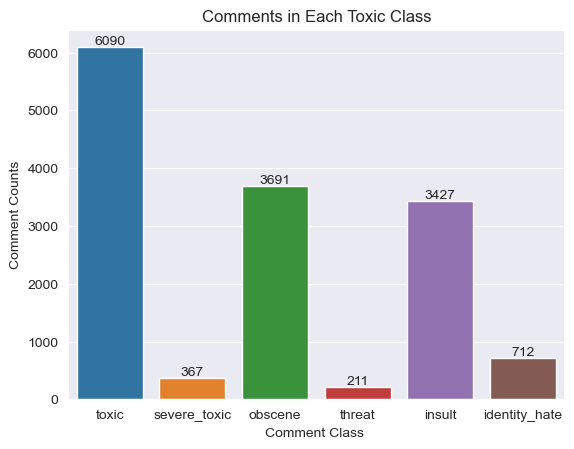

In [53]:
#Test Data - Ratio of comments in each toxic class for all tests which have valid labels

categories= list(non_null_data.columns.values[1:])

counts=[]
for category in categories:
    count=non_null_data[category].sum()
    print("category: "+category + " count: "+str(count))
    ratio= round(count/len(non_null_data),3)
    counts.append((category,count,ratio))
category_stat = pd.DataFrame(counts, columns=["Class","Counts","Percentage"])
category_stat

ax= sns.barplot(x="Class",y="Counts",data=category_stat)
ax.bar_label(ax.containers[0])
plt.title("Comments in Each Toxic Class")
plt.ylabel('Comment Counts')
plt.xlabel('Comment Class ')

In [39]:
#exploring training data
train_ds = pd.read_csv('train.csv', header=0)

# print(train_ds.shape)
#print(train_ds.head(5))

toxic_comments = train_ds.loc[(train_ds['toxic'] == 0.0) & (train_ds['identity_hate'] == 1.0)]
print(toxic_comments.shape)
print(toxic_comments.head(1))

(103, 8)
                    id                                       comment_text  \
3620  09b51ed1ee5e29a1  Mate, sound like you are jewish\n\nGayness is ...   

      toxic  severe_toxic  obscene  threat  insult  identity_hate  
3620      0             0        0       0       0              1  
